# 물류 데이터 불러오기

In [5]:
import pandas as pd
# 생산 공장 데이터
factories = pd.read_csv('tbl_factory.csv', index_col=0) # index_col = 0 : 0번째 컬럼을 인덱스에 추가
factories


,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [10]:
# 창고 데이터
warehouses = pd.read_csv('tbl_warehouse.csv', index_col=0)
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부
WH00006,광주창고,65,남부


In [8]:
# 창고와 공장 간의 운송 비용
cost = pd.read_csv('rel_cost.csv', index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [9]:
# 운송실적
trans = pd.read_csv('tbl_transaction.csv', index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


### 운송 비용과 운송실적 결합

In [15]:
join_data = pd.merge(trans,cost, left_on=["ToFC","FromWH"], right_on=["FCID","WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [16]:
join_data = pd.merge(join_data,factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부


## pd.merge(join_data,factories, left_on="ToFC", right_on="FCID", how="left") 방식
## join_data에서 키로서 결합할 ToFC와 factories에서 키로서 결합할 FCID
## 즉 left_on은 merge에서 왼쪽 데이터의 결합할 키, right_on은 merge에서 오른쪽 데이터의 결합할 키

In [17]:
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName","FCDemand","FromWH","WHName","WHSupply","WHRegion"]] # 컬럼 순서 정리
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [18]:
north = join_data.loc[join_data["WHRegion"]=="북부"] # WHRegion이 북부인 데이터만 추출
north.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부


In [19]:
south = join_data.loc[join_data["WHRegion"]=="남부"] # WHRegion이 남부인 데이터만 추출
south.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부


### 현재 운송량과 비용 확인


In [21]:
print("북부지사 총비용: " + str(north["Cost"].sum()) + "만원" )
print("남부지사 총비용: " + str(south["Cost"].sum()) + "만원" )

북부지사 총비용: 2189.3만원
남부지사 총비용: 2062.0만원


In [22]:
print("북부지사 총부품 운송개수: " + str(north["Quantity"].sum()) + "개" )
print("남부지사 총부품 운송개수: " + str(south["Quantity"].sum()) + "개" )

북부지사 총부품 운송개수: 49146개
남부지사 총부품 운송개수: 50214개


In [24]:
tmp = (north["Cost"].sum() / north["Quantity"].sum()) * 10000
print("북부지사의 부품 1개당 운송 비용:" + str(int(tmp)) + "원")
tmp = (south["Cost"].sum() / south["Quantity"].sum()) * 10000
print("남부지사의 부품 1개당 운송 비용:" + str(int(tmp)) + "원")

북부지사의 부품 1개당 운송 비용:445원
남부지사의 부품 1개당 운송 비용:410원


In [27]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
print("북부지사의 평균 운송 비용:" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="북부"].mean()) + "원")
print("남부지사의 평균 운송 비용:" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="남부"].mean()) + "원")

북부지사의 평균 운송 비용:1.075원
남부지사의 평균 운송 비용:1.05원


### 네트워크 가시화


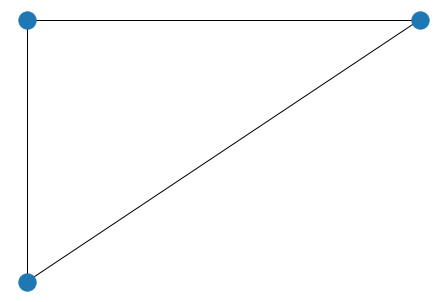

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 객체 생성
G=nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB", "nodeC")

# 좌표 설정
pos = {}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

# 그리기
nx.draw(G,pos)

# 표시
plt.show()

### 네트워크에 노드 추가

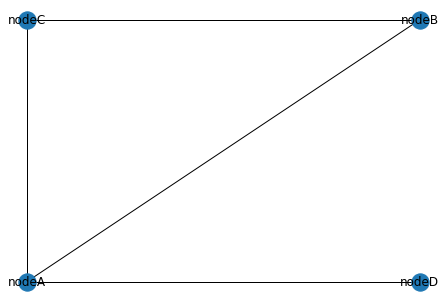

In [30]:
# 그래프 객체 생성
G=nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

# 엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB", "nodeC")
G.add_edge("nodeA", "nodeD")

# 좌표 설정
pos = {}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)
pos["nodeD"]=(1,0)

# 그리기
nx.draw(G,pos, with_labels=True) # with_labels = 라벨 표시

# 표시
plt.show()

### 경로에 가중치 부여

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

5
5


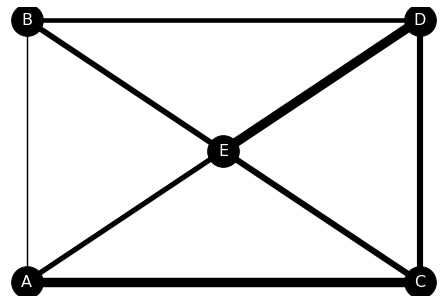

In [35]:
# 데이터 불러오기
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

print(len(df_w))
print(len(df_w.columns))
# 엣지 가중치 리스트화
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
        
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

# 엣지 설정
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i],df_w.columns[j])

# 좌표 설정
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0],df_p[node][1])
    
# 그리기
nx.draw(G, pos, with_labels=True, font_size=16, node_size = 1000, node_color="k", font_color='w', width=edge_weights)

# 표시
plt.show()

### 운송 경로 정보 불러오기


In [36]:
import pandas as pd
# 데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_tr.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


### 운송 경로 정보로 네트워크 가시화


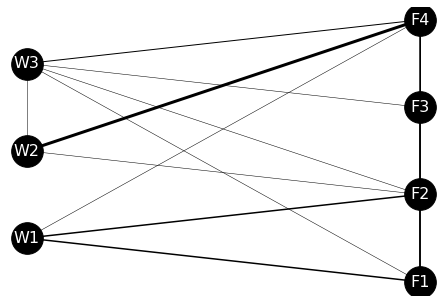

Index(['W1', 'W2', 'W3'], dtype='object', name='공장')
Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
Index(['W1', 'W2', 'W3', 'F1', 'F2', 'F3', 'F4'], dtype='object')


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# 데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_pos = pd.read_csv('trans_route_pos.csv')

# 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

# 엣지 설정 및 가중치 리스트화
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # 엣지 추가
            G.add_edge(df_pos.columns[i],df_pos.columns[j])
            # 엣지 가중치 추가
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
            if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                    weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
            elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                    weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
            edge_weights.append(weight)
# 좌표 설정
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])

# 그리기
nx.draw(G, pos, with_labels = True,font_size=16, node_size = 1000, node_color ='k', font_color='w', width=edge_weights)

#표시
plt.show()
                    
print(df_tr.index)
print(df_tr.columns)
print(df_pos.columns)

### 운송 비용 함수 작성

In [64]:
import pandas as pd

# 데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_tc = pd.read_csv('trans_cost.csv', index_col="공장")

# 운송 비용 함수
def trans_cost(df_tr,df_tc):
    cost=0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print(df_tr.iloc[1][1]*df_tc.iloc[1][0])
print("총 운송 비용:"+str(trans_cost(df_tr,df_tc)))

0
총 운송 비용:1493


### 제약 조건

In [73]:
import pandas as pd

# 데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

# 수요측 제약조건
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i])+"으로 운송량:"+str(temp_sum)+" (수요량:"+str(df_demand.iloc[0][i])+")")
    if temp_sum>=df_demand.iloc[0][i]:
        print("수요량을 만족시키고있음")
    else:
        print("수요량을 만족시키지 못하고 있음. 운송경로 재계산 필요")

# 공급측 제약조건
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"부터의 운송량:"+str(temp_sum)+" (공급한계:"+str(df_supply.iloc[0][i])+")")
    if temp_sum<=df_supply.iloc[0][i]:
        print("공급한계 범위내")
    else:
        print("공급한계 초과. 운송경로 재계산 필요")


    

F1으로 운송량:30 (수요량:28)
수요량을 만족시키고있음
F2으로 운송량:30 (수요량:29)
수요량을 만족시키고있음
F3으로 운송량:32 (수요량:31)
수요량을 만족시키고있음
F4으로 운송량:25 (수요량:25)
수요량을 만족시키고있음
W1부터의 운송량:35 (공급한계:35)
공급한계 범위내
W2부터의 운송량:40 (공급한계:41)
공급한계 범위내
W3부터의 운송량:42 (공급한계:42)
공급한계 범위내
공장
W1    15
W2     5
W3    10
Name: F1, dtype: int64


### 운송 경로를 변경하여 운송 비용 함수의 변화 확인

In [78]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df_tr_new = pd.read_csv('trans_route_new.csv', index_col="공장")
print(df_tr_new)

# 총 운송 비용 재계산
print("총 운송 비용(변경 후) :"+str(trans_cost(df_tr_new,df_tc)))

# 제약 조건 계산 함수
# 수요측
def condition_demand(df_tr,df_demand):
    flag = np.zeros(len(df_demand.columns)) # 0으로 가득찬 array np.zeros(2,5) 2줄 0이 5개인 array
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag
# 공급측
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum<=df_supply.iloc[0][i]:
            flag[i] = 1
    return flag
print("수요조건 계산결과:"+str(condition_demand(df_tr_new,df_demand)))
print("공급조건 계산결과:"+str(condition_supply(df_tr_new,df_supply)))



    F1  F2  F3  F4
공장                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
총 운송 비용(변경 후) :1428
수요조건 계산결과:[1. 1. 1. 1.]
공급조건 계산결과:[1. 0. 1.]
